# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 300)
np.random.seed(42)

In [2]:
train_df, valid_df = train_test_split(
    pd.read_csv("./data/train.csv"),
    test_size = 0.2,
    random_state = 42
)
train_df = train_df.set_index("row_id")
train_df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
row_id,,,,,,,,,,,,,,,,,
63719,2,2019-08-28 00:00:00+08:00,103844,48,9,5,65,1,6,11,6,33,71,4,4,8,0
39248,3,2019-08-11 00:00:00+08:00,60927,43,18,10,Never checkout,0,1,2,2,5,26,0,0,0,0
61537,3,2019-08-27 00:00:00+08:00,53899,49,25,231,257,0,6,9,0,0,0,0,0,0,0
5770,4,2019-07-19 00:00:00+08:00,88545,46,12,22,Never checkout,0,1,1,0,2,9,0,0,0,0
48800,5,2019-08-18 00:00:00+08:00,7106,24,25,9,39,0,1,1,4,8,17,0,0,1,0


In [3]:
# corr_mat = train_df.drop("open_flag", axis = 1).corr()
# fig, ax = plt.subplots(figsize = (20, 20))
# sns.heatmap(corr_mat, annot = True, ax = ax)

In [4]:
valid_df = valid_df.set_index("row_id")
valid_df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
row_id,,,,,,,,,,,,,,,,,
11995,3,2019-07-23 00:00:00+08:00,113696,39,Never open,11,24,0,0,0,0,6,6,0,1,1,0
69852,1,2019-09-02 00:00:00+08:00,5375,33,97,2,2,0,0,0,11,19,70,1,1,2,0
7149,2,2019-07-21 00:00:00+08:00,32645,43,58,2,10,0,0,1,25,76,149,1,4,10,0
4449,2,2019-07-18 00:00:00+08:00,103814,52,3,12,78,4,17,30,0,8,10,0,0,0,1
36644,3,2019-08-08 00:00:00+08:00,117490,52,Never open,21,Never checkout,3,3,3,0,1,1,0,0,0,0


In [5]:
test_df = pd.read_csv("./data/test.csv")
test_df = test_df.set_index("row_id")
test_df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
row_id,,,,,,,,,,,,,,,,
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2


In [6]:
users_df = pd.read_csv("./data/users.csv")
users_df = users_df.set_index("user_id")
users_df.head()

,attr_1,attr_2,attr_3,age,domain
user_id,,,,,
0,NaN,1.0,0.0,NaN,@gmail.com
1,1.0,1.0,2.0,50.0,@gmail.com
2,NaN,1.0,0.0,NaN,other
3,NaN,1.0,0.0,NaN,@gmail.com
4,1.0,1.0,2.0,33.0,@gmail.com


# Preprocessing (Users)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
users_df_clean = users_df.copy()

# Filling missing values
users_df_clean["attr_1"] = users_df_clean["attr_1"].fillna(1.0)
users_df_clean["attr_2"] = users_df_clean["attr_2"].fillna(1.0)

# Masking age
users_df_clean["age"] = users_df_clean["age"].mask((users_df_clean["age"] > 70) | (users_df_clean["age"] < 15))

# Converting domains to integers
domains = ['@gmail.com', 'other', '@yahoo.com', '@hotmail.com', '@ymail.com', '@live.com', '@icloud.com', '@outlook.com', '@rocketmail.com', '@qq.com', '@163.com']
domains_dict = {key: domains.index(key) for key in domains}
users_df_clean["domain"] = users_df_clean["domain"].map(lambda x: domains_dict[x])

# Predicting missing ages using KNN Regressor
users_train_df = users_df_clean[users_df_clean["age"].notna()].astype(int)
users_test_df = users_df_clean[users_df_clean["age"].isna()].drop("age", axis = 1).astype(int)

knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(users_train_df.drop("age", axis = 1).to_numpy(), users_train_df["age"].to_numpy())

users_df_clean = users_train_df.copy()
for key, group in users_test_df.groupby(["attr_1", "attr_2", "attr_3", "domain"]):
    group = group.copy()
    most_likely_age = knn.predict([np.array(key)])
    std_dev = 7
    group.loc[:, "age"] = np.rint(np.random.normal(most_likely_age, std_dev, len(group)))
    users_df_clean = pd.concat([users_df_clean, group])

users_df_clean = users_df_clean.astype(int)
users_df_clean = users_df_clean.sort_index()
users_df_clean

,attr_1,attr_2,attr_3,age,domain
user_id,,,,,
0,1,1,0,39,0
1,1,1,2,50,0
2,1,1,0,37,1
3,1,1,0,29,0
4,1,1,2,33,0
...,...,...,...,...,...
127921,1,1,0,36,2
127922,1,1,0,20,0
127923,1,1,0,34,0


# Preprocessing (Train)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
def prepare_data(df, users_df):
    tdf = df.copy()
    tdf = tdf.merge(users_df, on = "user_id")
    tdf = tdf.rename(columns = {
        "open_count_last_10_days": "open_10",
        "open_count_last_30_days": "open_30",
        "open_count_last_60_days": "open_60",
        "login_count_last_10_days": "login_10",
        "login_count_last_30_days": "login_30",
        "login_count_last_60_days": "login_60",
        "checkout_count_last_10_days": "checkout_10",
        "checkout_count_last_30_days": "checkout_30",
        "checkout_count_last_60_days": "checkout_60",
        "subject_line_length": "subject_len"
    })
    return tdf
train_df_merged = prepare_data(train_df, users_df_clean)
train_df_merged.head()

,country_code,grass_date,user_id,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,login_10,login_30,login_60,checkout_10,checkout_30,checkout_60,open_flag,attr_1,attr_2,attr_3,age,domain
0,2,2019-08-28 00:00:00+08:00,103844,48,9,5,65,1,6,11,6,33,71,4,4,8,0,1,1,2,43,0
1,3,2019-08-11 00:00:00+08:00,60927,43,18,10,Never checkout,0,1,2,2,5,26,0,0,0,0,1,1,1,38,0
2,3,2019-08-27 00:00:00+08:00,53899,49,25,231,257,0,6,9,0,0,0,0,0,0,0,1,1,2,18,0
3,3,2019-07-23 00:00:00+08:00,53899,47,1,196,222,2,2,3,0,0,0,0,0,0,0,1,1,2,18,0
4,4,2019-07-19 00:00:00+08:00,88545,46,12,22,Never checkout,0,1,1,0,2,9,0,0,0,0,1,1,2,39,2


In [11]:
def clean_data(df):
    tdf = df.copy()
    
    # Replace text with integers
    tdf["last_open_day"] = tdf["last_open_day"].replace("Never open", 18142)
    tdf["last_login_day"] = tdf["last_login_day"].replace("Never login", 18142)
    tdf["last_checkout_day"] = tdf["last_checkout_day"].replace("Never checkout", 18142)
    
    # Reset data types
    tdf["grass_date"] = pd.to_datetime(tdf["grass_date"]).dt.tz_localize(None)
    tdf.loc[:, tdf.columns != "grass_date"] = tdf.loc[:, tdf.columns != "grass_date"].astype(int)
    
    # Fix dirty data in open_*, login_* and checkout_*
    tdf.loc[((tdf["last_open_day"] > 10) & (tdf["open_10"] > 0)), "open_10"] = 0
    tdf.loc[((tdf["last_open_day"] > 30) & (tdf["open_30"] > 0)), "open_30"] = 0
    tdf.loc[((tdf["last_open_day"] > 60) & (tdf["open_60"] > 0)), "open_60"] = 0
    
    tdf.loc[((tdf["last_login_day"] > 10) & (tdf["login_10"] > 0)), "login_10"] = 0
    tdf.loc[((tdf["last_login_day"] > 30) & (tdf["login_30"] > 0)), "login_30"] = 0
    tdf.loc[((tdf["last_login_day"] > 60) & (tdf["login_60"] > 0)), "login_60"] = 0
    
    tdf.loc[((tdf["last_checkout_day"] > 10) & (tdf["checkout_10"] > 0)), "checkout_10"] = 0
    tdf.loc[((tdf["last_checkout_day"] > 30) & (tdf["checkout_30"] > 0)), "checkout_30"] = 0
    tdf.loc[((tdf["last_checkout_day"] > 60) & (tdf["checkout_60"] > 0)), "checkout_60"] = 0
    
    # Cap outliers values
    tdf["last_open_day"] = tdf["last_open_day"].clip(0, 365 * 2)
    tdf["last_login_day"] = tdf["last_login_day"].clip(0, 365 * 2)
    tdf["last_checkout_day"] = tdf["last_checkout_day"].clip(0, 365 * 2)
    return tdf

train_df_clean = clean_data(train_df_merged)
train_df_clean

,country_code,grass_date,user_id,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,login_10,login_30,login_60,checkout_10,checkout_30,checkout_60,open_flag,attr_1,attr_2,attr_3,age,domain
0,2,2019-08-28,103844,48,9,5,65,1,6,11,6,33,71,0,0,0,0,1,1,2,43,0
1,3,2019-08-11,60927,43,18,10,730,0,1,2,2,5,26,0,0,0,0,1,1,1,38,0
2,3,2019-08-27,53899,49,25,231,257,0,6,9,0,0,0,0,0,0,0,1,1,2,18,0
3,3,2019-07-23,53899,47,1,196,222,2,2,3,0,0,0,0,0,0,0,1,1,2,18,0
4,4,2019-07-19,88545,46,12,22,730,0,1,1,0,2,9,0,0,0,0,1,1,2,39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58826,3,2019-08-15,48651,39,23,65,68,0,2,4,0,0,0,0,0,0,1,1,1,2,29,0
58827,1,2019-08-09,44041,60,43,0,1,0,0,1,38,91,169,11,25,34,0,1,1,1,45,0
58828,1,2019-07-20,22645,46,91,2,23,0,0,0,41,106,160,0,8,10,0,1,1,2,21,0
58829,1,2019-08-22,19737,61,121,1,52,0,0,0,12,40,96,0,0,2,0,1,1,1,28,0


In [87]:
def engineer_features(df):
    tdf = df.copy()

    # Extract date features
    tdf["grass_month"] = tdf["grass_date"].map(lambda x: x.month)
    tdf["grass_day"] = tdf["grass_date"].map(lambda x: x.day)
    tdf["grass_dow"] = tdf["grass_date"].map(lambda x: x.dayofweek)
    
    # Summarize login and checkout features
#     tdf["interaction_10"] = tdf["open_10"] + tdf["login_10"] + tdf["checkout_10"]
#     tdf["interaction_30"] = tdf["open_30"] + tdf["login_30"] + tdf["checkout_30"]
#     tdf["interaction_60"] = tdf["open_60"] + tdf["login_60"] + tdf["checkout_60"]
    
    # Summarize open_*, login_*, checkout_*
    tdf["open_rate"] = ((tdf["open_10"] / 10) + ((tdf["open_30"] - tdf["open_10"]) / 20) + ((tdf["open_60"] - tdf["open_30"]) / 30)) / 3
    tdf["login_rate"] = ((tdf["login_10"] / 10) + ((tdf["login_30"] - tdf["login_10"]) / 20) + ((tdf["login_60"] - tdf["login_30"]) / 30)) / 3
    tdf["checkout_rate"] = ((tdf["checkout_10"] / 10) + ((tdf["checkout_30"] - tdf["checkout_10"]) / 20) + ((tdf["checkout_60"] - tdf["checkout_30"]) / 30)) / 3

#     user_open_rate = tdf.groupby("user_id")["open_rate"].mean().rename("user_open_rate")
#     tdf = tdf.merge(user_open_rate, on = "user_id")
    
    country_open_rate = tdf.groupby("country_code")["open_rate"].mean().rename("country_open_rate")
    tdf = tdf.merge(country_open_rate, on = "country_code")
    domain_open_rate = tdf.groupby("domain")["open_rate"].mean().rename("domain_open_rate")
    tdf = tdf.merge(domain_open_rate, on = "domain")
    
    tdf["log_last_open_day"] = (tdf["last_open_day"] + 1).transform(np.log)
    tdf["log_last_login_day"] = (tdf["last_login_day"] + 1).transform(np.log)
    tdf["log_last_checkout_day"] = (tdf["last_checkout_day"] + 1).transform(np.log)
    
    tdf = tdf.drop([
        "grass_date", "user_id", 
#         "checkout_10", "checkout_30", "checkout_60",
#         "login_10", "login_30", "login_60", "open_10", "open_30", "open_60",
#         "attr_1", "attr_2", "last_open_day", "last_login_day", "last_checkout_day"
    ], axis = 1)
    return tdf

train_df_all = engineer_features(train_df_clean)
train_df_all

,country_code,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,login_10,login_30,login_60,checkout_10,checkout_30,checkout_60,open_flag,attr_1,attr_2,attr_3,age,domain,grass_month,grass_day,grass_dow,open_rate,login_rate,checkout_rate,country_open_rate,domain_open_rate,log_last_open_day,log_last_login_day,log_last_checkout_day
0,2,48,9,5,65,1,6,11,6,33,71,0,0,0,0,1,1,2,43,0,8,28,2,0.172222,1.072222,0.000000,0.134997,0.080173,2.302585,1.791759,4.189655
1,2,55,3,5,19,1,4,9,18,96,145,0,11,28,0,1,1,2,24,0,7,20,5,0.138889,2.444444,0.372222,0.134997,0.080173,1.386294,1.791759,2.995732
2,2,56,21,3,35,0,1,1,15,47,106,0,0,3,0,1,1,1,40,0,8,19,0,0.016667,1.688889,0.033333,0.134997,0.080173,3.091042,1.386294,3.583519
3,2,48,4,1,14,1,3,7,20,70,115,0,3,3,0,1,1,1,30,0,7,25,3,0.111111,2.000000,0.050000,0.134997,0.080173,1.609438,0.693147,2.708050
4,2,38,31,109,730,0,0,1,0,0,0,0,0,0,0,1,1,0,35,0,8,7,2,0.011111,0.000000,0.000000,0.134997,0.080173,3.465736,4.700480,6.594413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58826,1,68,200,3,5,0,0,0,21,54,111,5,23,58,0,1,1,2,28,8,8,20,1,0.000000,1.883333,0.855556,0.051575,0.119658,5.303305,1.386294,1.791759
58827,1,60,1,1,15,9,25,32,30,93,185,0,3,10,1,1,1,2,50,8,8,9,4,0.644444,3.072222,0.127778,0.051575,0.119658,0.693147,0.693147,2.772589
58828,1,59,1,1,21,8,23,36,20,84,182,0,3,9,0,1,1,2,50,8,8,15,3,0.661111,2.822222,0.116667,0.051575,0.119658,0.693147,0.693147,3.091042
58829,6,33,13,1,1,0,6,11,5,19,49,1,6,13,0,1,1,2,51,8,8,18,6,0.155556,0.733333,0.194444,0.133441,0.119658,2.639057,0.693147,0.693147


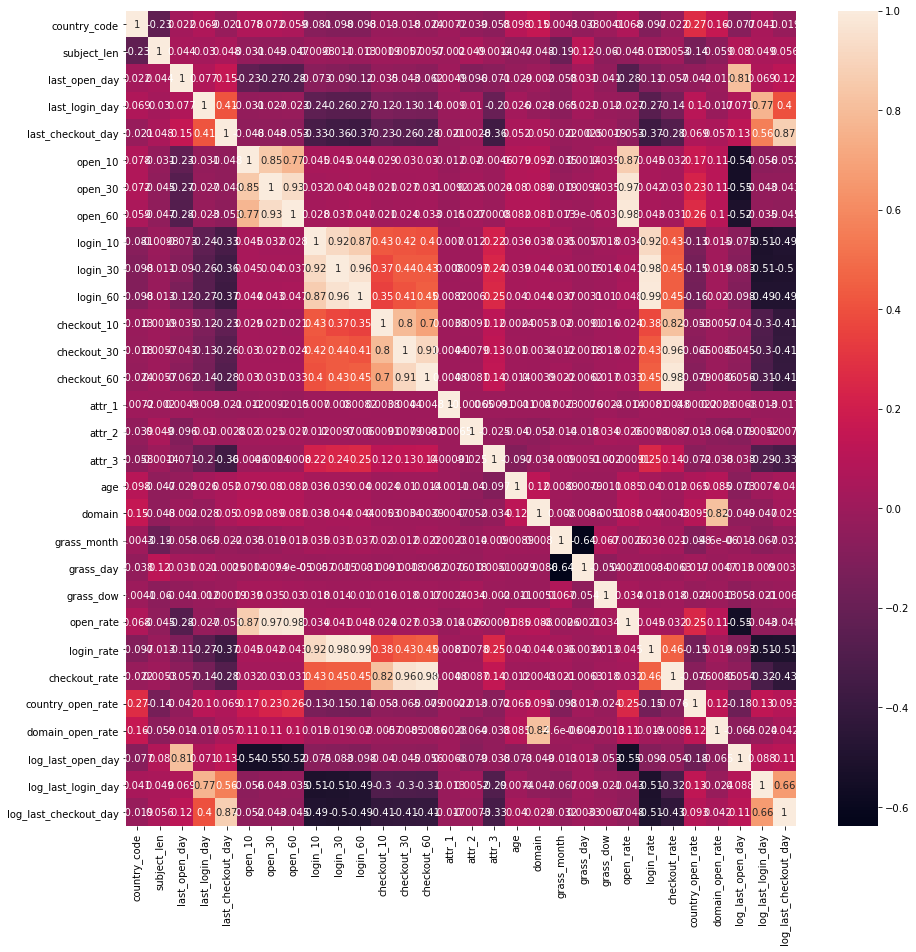

In [88]:
corr_mat = train_df_all.drop("open_flag", axis = 1).corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corr_mat, annot = True, ax = ax)

In [89]:
train_df_all.describe()

,country_code,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,login_10,login_30,login_60,checkout_10,checkout_30,checkout_60,open_flag,attr_1,attr_2,attr_3,age,domain,grass_month,grass_day,grass_dow,open_rate,login_rate,checkout_rate,country_open_rate,domain_open_rate,log_last_open_day,log_last_login_day,log_last_checkout_day
count,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000,58831.000000
mean,2.528259,43.667318,104.753599,49.601843,223.483368,0.838605,2.728103,4.972073,7.828475,24.942003,48.580986,0.825687,2.673454,5.263535,0.154816,0.999847,0.997263,1.076082,31.828339,0.420204,7.776495,16.546855,2.621883,0.084378,0.808830,0.087098,0.084378,0.084378,3.143643,2.503804,4.006741
std,1.673740,11.231003,218.528091,114.804565,296.627117,1.717408,4.557534,7.885125,13.486332,37.653692,71.408958,2.677318,7.432417,13.577804,0.361733,0.012368,0.052242,1.034337,8.392226,1.242726,0.601123,9.258896,2.034472,0.135615,1.199369,0.223937,0.034003,0.014652,1.660479,1.550020,1.929974
min,1.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.051575,0.080173,0.693147,0.000000,0.693147
25%,1.000000,34.000000,6.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,26.000000,0.000000,7.000000,8.000000,1.000000,0.000000,0.044444,0.000000,0.051575,0.080173,1.945910,1.386294,2.397895
50%,2.000000,43.000000,18.000000,8.000000,44.000000,0.000000,1.000000,2.000000,1.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000,0.000000,8.000000,18.000000,3.000000,0.033333,0.361111,0.016667,0.092897,0.080173,2.944439,2.197225,3.806662
75%,3.000000,52.000000,56.000000,27.000000,454.000000,1.000000,3.000000,6.000000,11.000000,35.000000,68.000000,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,2.000000,37.000000,0.000000,8.000000,24.000000,4.000000,0.100000,1.127778,0.094444,0.101971,0.080173,4.043051,3.332205,6.120297
max,7.000000,75.000000,730.000000,730.000000,730.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,1.000000,1.000000,4.000000,70.000000,10.000000,9.000000,30.000000,6.000000,2.527778,22.316667,14.266667,0.134997,0.196790,6.594413,6.594413,6.594413


In [90]:
x_train_df, y_train = train_df_all.drop("open_flag", axis = 1), train_df_all["open_flag"].to_numpy()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_df)
x_train

array([[-0.31561848,  0.38578199, -0.43817897, ..., -0.50651948,
        -0.45938157,  0.09477617],
       [-0.31561848,  1.00906201, -0.46563562, ..., -1.05834733,
        -0.45938157, -0.52384994],
       [-0.31561848,  1.09810201, -0.38326565, ..., -0.03167813,
        -0.7209708 , -0.21929065],
       ...,
       [-0.91308778,  1.36522202, -0.47478784, ..., -1.47578898,
        -1.16816054, -0.47446536],
       [ 2.0742587 , -0.94981804, -0.41987453, ..., -0.3038821 ,
        -1.16816054, -1.71692513],
       [ 2.0742587 ,  0.20770199,  2.86119607, ...,  2.07819555,
        -1.61535028, -1.50683501]])

In [91]:
valid_df_final = prepare_data(valid_df, users_df_clean)
valid_df_final = clean_data(valid_df_final)
valid_df_final = engineer_features(valid_df_final)

x_valid_df, y_valid = valid_df_final.drop("open_flag", axis = 1), valid_df_final["open_flag"].to_numpy()
x_valid = scaler.transform(x_valid_df)
x_valid

array([[ 0.28185082, -0.41557803,  2.86119607, ...,  2.07819555,
        -0.01219184, -0.40822901],
       [ 0.28185082,  0.741942  ,  2.86119607, ...,  2.07819555,
         0.37886178,  1.34079221],
       [ 0.28185082, -1.30597805, -0.45648341, ..., -0.81415962,
         0.24939739,  1.07893751],
       ...,
       [ 1.47678941, -2.99773809,  1.14515496, ...,  1.64489355,
         1.52992431,  0.96066621],
       [ 2.671728  ,  0.652902  , -0.47478784, ..., -1.47578898,
         0.4349979 , -0.23388728],
       [ 2.671728  ,  1.81042203, -0.4519073 , ..., -0.72132376,
        -0.57700786,  0.64536776]])

# Training

In [92]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV

In [93]:
model = RandomForestClassifier(
    n_estimators = 64,                # 32, 64, 128
    min_samples_split = 48,           # 48, 64
    max_depth = 32,                   # 28, 32, 36, 40
    min_samples_leaf = 1,             # 1, 2
    random_state = 42,
    class_weight = "balanced"
)
selector = RFECV(model, step = 1, cv = 10, scoring = make_scorer(matthews_corrcoef), n_jobs = -1, verbose = 1)
selector.fit(x_train, y_train)

RFECV(cv=10,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=32,
                                       min_samples_split=48, n_estimators=64,
                                       random_state=42),
      n_jobs=-1, scoring=make_scorer(matthews_corrcoef))

Optimal number of features: 20


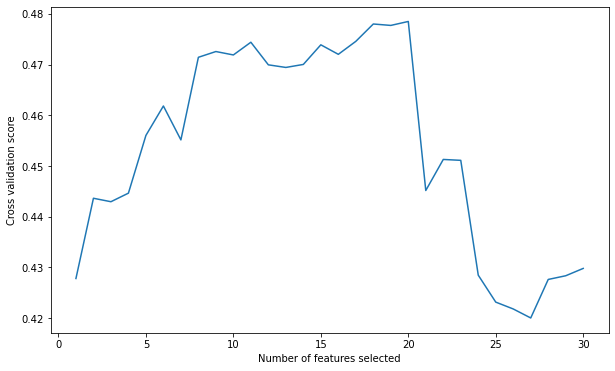

Discarded Features:


8             login_10
11         checkout_10
12         checkout_30
13         checkout_60
14              attr_1
15              attr_2
16              attr_3
18              domain
19         grass_month
26    domain_open_rate
dtype: object

In [94]:
print('Optimal number of features: {}'.format(selector.n_features_))

plt.figure(figsize = (10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

print("Discarded Features:")
pd.Series(x_train_df.columns)[pd.Series(selector.support_) == False]

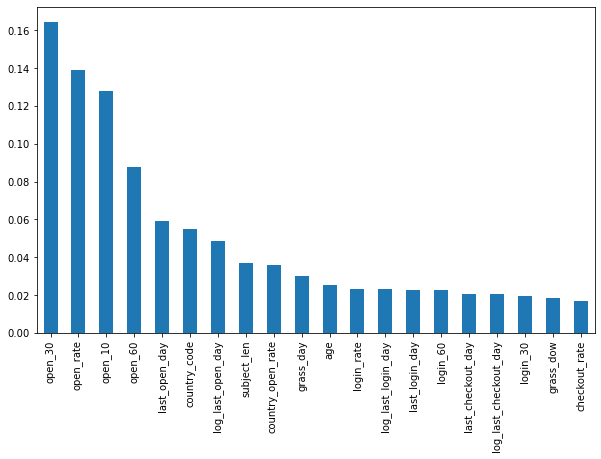

In [95]:
feat_importances = pd.Series(selector.estimator_.feature_importances_, index = pd.Series(x_train_df.columns)[pd.Series(selector.support_)])
feat_importances.sort_values(ascending = False).plot(kind = 'bar', figsize = (10, 6))

Train - 0.6382 - Valid - 0.4916


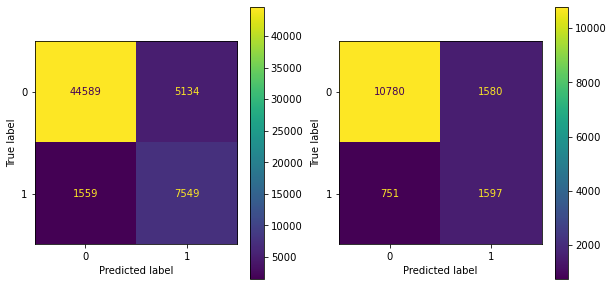

In [96]:
model = RandomForestClassifier(
    n_estimators = 64,                # 32, 64, 128
    min_samples_split = 48,           # 48, 64
    max_depth = 32,                   # 28, 32, 36, 40
    min_samples_leaf = 1,             # 1, 2
    random_state = 42,
    class_weight = "balanced"
)
model.fit(x_train[:, np.where(selector.support_ == True)[0]], y_train)

print("Train - {:.4f} - Valid - {:.4f}".format(
    matthews_corrcoef(y_train, model.predict(x_train[:, np.where(selector.support_ == True)[0]])),
    matthews_corrcoef(y_valid, model.predict(x_valid[:, np.where(selector.support_ == True)[0]])))
)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
plot_confusion_matrix(model, x_train[:, np.where(selector.support_ == True)[0]], y_train, ax = ax[0])
plot_confusion_matrix(model, x_valid[:, np.where(selector.support_ == True)[0]], y_valid, ax = ax[1])

Train - 0.6479 - Valid - 0.4876


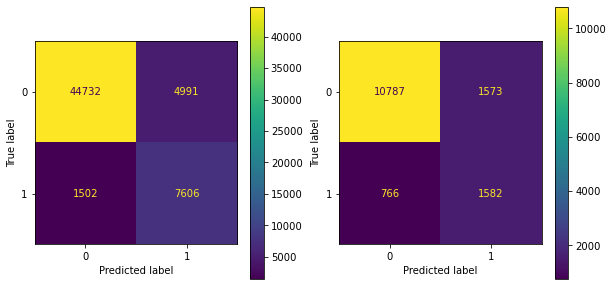

In [97]:
model = RandomForestClassifier(
    n_estimators = 64,                # 32, 64, 128
    min_samples_split = 48,           # 48, 64
    max_depth = 32,                   # 28, 32, 36, 40
    min_samples_leaf = 1,             # 1, 2
    random_state = 42,
    class_weight = "balanced"
)
model.fit(x_train, y_train)

print("Train - {:.4f} - Valid - {:.4f}".format(
    matthews_corrcoef(y_train, model.predict(x_train)),
    matthews_corrcoef(y_valid, model.predict(x_valid)))
)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
plot_confusion_matrix(model, x_train, y_train, ax = ax[0])
plot_confusion_matrix(model, x_valid, y_valid, ax = ax[1])

In [98]:
# models = {
#     "Random Forest": RandomForestClassifier(min_samples_split = 64, random_state = 42),
#     "AdaBoost": AdaBoostClassifier(random_state = 42),
#     "Extra Trees": ExtraTreesClassifier(min_samples_split = 64, random_state = 42),
#     "Decision Tree": DecisionTreeClassifier(min_samples_split = 64, random_state = 42),
#     "Linear SVM": LinearSVC(random_state = 42, max_iter = 1000, dual = False),
#     "SGD Classifier": SGDClassifier(random_state = 42)
# }

# for model_name, model in models.items():
#     model.fit(x_train_final, y_train)
#     print("{} - Train - {:.4f} - Valid - {:.4f}".format(
#         model_name,
#         matthews_corrcoef(y_train, model.predict(x_train_final)),
#         matthews_corrcoef(y_valid, model.predict(x_valid_final)))
#     )

# Prediction

In [99]:
# test_df_clean = preprocess(test_df, users_df_clean)
# test_df_clean

In [100]:
# pred = model.predict(test_df_clean.to_numpy())
# pred

In [101]:
# output_df = pd.DataFrame({
#     "row_id": test_df_clean.index,
#     "open_flag": pred
# })
# output_df

In [102]:
# print(train_df_clean["open_flag"].value_counts(normalize = True))
# print(output_df["open_flag"].value_counts(normalize = True))

In [103]:
# output_df.to_csv("./data/submission.csv", index = False)